In [1]:
import utils
import analyses_utils as an

import pandas as pd
import matplotlib.pyplot as plt

# PDPT

## Paper

In [2]:
instances = utils.pick_pdpt_instances(5, 4, 'Rais')

In [3]:
df = pd.read_csv(utils.PDPT_PAPER_RESULTS_PATH, sep='\t')
df = df[df['Instance'].isin(instances)]
df['Params'] = df['Instance'].apply(lambda name: name[5:13])

df_rais = df[df['Model'] == 'Rais']
df_lyu = df[df['Model'] == 'Lyu']

In [4]:
an.get_results_stats(df_rais)

,opt,lim,no,gap,t
Params,,,,,
R5-K2-T1,4,0,0,0.000000,23.248691
R5-K2-T2,4,0,0,0.000000,29.971921
R5-K3-T3,4,0,0,0.000000,107.151039
R7-K2-T1,3,1,0,0.206544,1705.538958
R7-K2-T2,4,0,0,0.000000,1770.155523


In [5]:
an.get_results_stats(df_lyu)

,opt,lim,no,gap,t
Params,,,,,
R5-K2-T1,4,0,0,0.0,0.085759
R5-K2-T2,4,0,0,0.0,0.164039
R5-K3-T3,4,0,0,0.0,0.223778
R7-K2-T1,4,0,0,0.0,6.525908
R7-K2-T2,4,0,0,0.0,1.733981


## Project

In [6]:
df = pd.read_csv('../results/PDPT.csv')
df['Params'] = df['Instance'].apply(lambda name: name[5:13])

df_rais = df[df['Model'] == 'Rais']
df_lyu = df[df['Model'] == 'Lyu']

In [7]:
an.get_results_stats(df_rais)

,opt,lim,no,gap,t
Params,,,,,
R5-K2-T1,4,0,0,0.000000,31.42925
R5-K2-T2,4,0,0,0.000000,40.26250
R5-K3-T3,4,0,0,0.000000,221.65050
R7-K2-T1,2,2,0,0.140698,2029.01825
R7-K2-T2,4,0,0,0.000000,2162.41000


In [8]:
an.get_results_stats(df_lyu)

,opt,lim,no,gap,t
Params,,,,,
R5-K2-T1,4,0,0,0.0,0.15175
R5-K2-T2,4,0,0,0.0,0.31450
R5-K3-T3,4,0,0,0.0,0.40925
R7-K2-T1,4,0,0,0.0,7.90625
R7-K2-T2,4,0,0,0.0,1.37425


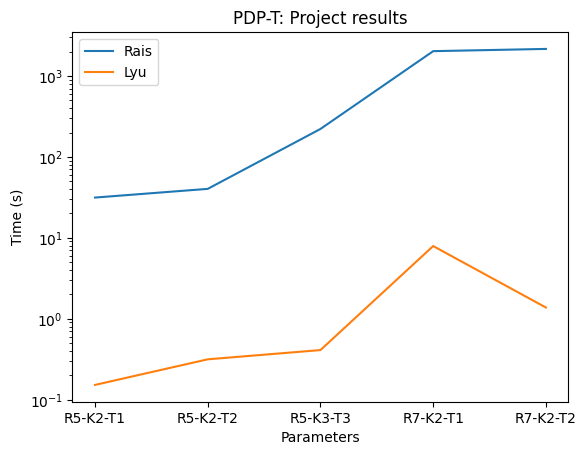

In [9]:
fig, ax = plt.subplots()

ax.plot(an.get_results_stats(df_rais)['t'], label='Rais')
ax.plot(an.get_results_stats(df_lyu)['t'], label='Lyu')

ax.set(title='PDP-T: Project results', 
       xlabel='Parameters', 
       ylabel='Time (s)', yscale='log')
ax.legend()

fig.savefig('../figures/PDPT.png')
plt.show()

# PDPTWT

## Paper

In [10]:
instances = utils.pick_pdptwt_instances(2, 'Sampaio', skip=['180', '300', '5T'])

In [11]:
df = pd.read_csv(utils.PDPTWT_PAPER_RESULTS_PATH, sep='\t')
df = df[df['Instance'].isin(instances)]
df['Params'] = df['Instance'].apply(lambda name: name[:13])

df_sampaio = df[df['Model'] == 'Sampaio']
df_lyu = df[df['Model'] == 'Lyu']

In [12]:
an.get_results_stats(df_sampaio)

,opt,lim,no,gap,t
Params,,,,,
3R-4K-4T-240L,2,0,0,0.000000,9.231899
3R-4K-4T-240M,2,0,0,0.000000,5.100620
3R-4K-4T-240S,2,0,0,0.000000,0.851732
4R-4K-4T-240L,2,0,0,0.000000,337.337275
4R-4K-4T-240M,2,0,0,0.000000,42.024628
4R-4K-4T-240S,2,0,0,0.000000,27.591332
5R-4K-4T-240L,0,2,0,0.149908,3600.026198
5R-4K-4T-240M,2,0,0,0.000000,1072.190763
5R-4K-4T-240S,2,0,0,0.000000,302.267466


In [13]:
an.get_results_stats(df_lyu)

,opt,lim,no,gap,t
Params,,,,,
3R-4K-4T-240L,2,0,0,0.0,5.524339
3R-4K-4T-240M,2,0,0,0.0,3.416602
3R-4K-4T-240S,2,0,0,0.0,2.195621
4R-4K-4T-240L,2,0,0,0.0,77.838708
4R-4K-4T-240M,2,0,0,0.0,26.966207
4R-4K-4T-240S,2,0,0,0.0,26.841693
5R-4K-4T-240L,2,0,0,0.0,1323.157136
5R-4K-4T-240M,2,0,0,0.0,770.505918
5R-4K-4T-240S,2,0,0,0.0,60.655713


## Project

In [14]:
df = pd.read_csv('../results/PDPTWT.csv')
df['Params'] = df['Instance'].apply(lambda name: name[:13])

df_sampaio = df[df['Model'] == 'Sampaio']
df_lyu = df[df['Model'] == 'Lyu']

In [15]:
an.get_results_stats(df_sampaio)

,opt,lim,no,gap,t
Params,,,,,
3R-4K-4T-240L,2,0,0,0.000000,252.4245
3R-4K-4T-240M,2,0,0,0.000000,94.7045
3R-4K-4T-240S,2,0,0,0.000000,7.4900
4R-4K-4T-240L,0,2,0,0.123391,3600.0565
4R-4K-4T-240M,2,0,0,0.000000,738.9845
4R-4K-4T-240S,2,0,0,0.000000,423.9510
5R-4K-4T-240L,0,1,1,0.258775,3600.0865
5R-4K-4T-240M,0,2,0,0.240746,3600.0900
5R-4K-4T-240S,2,0,0,0.000000,477.5090


In [16]:
an.get_results_stats(df_lyu)

,opt,lim,no,gap,t
Params,,,,,
3R-4K-4T-240L,2,0,0,0.000000,10.1000
3R-4K-4T-240M,2,0,0,0.000000,6.8170
3R-4K-4T-240S,2,0,0,0.000000,1.5140
4R-4K-4T-240L,2,0,0,0.000000,75.7895
4R-4K-4T-240M,2,0,0,0.000000,29.3220
4R-4K-4T-240S,2,0,0,0.000000,44.2840
5R-4K-4T-240L,1,1,0,0.077288,3142.6295
5R-4K-4T-240M,2,0,0,0.000000,650.7625
5R-4K-4T-240S,2,0,0,0.000000,63.8250


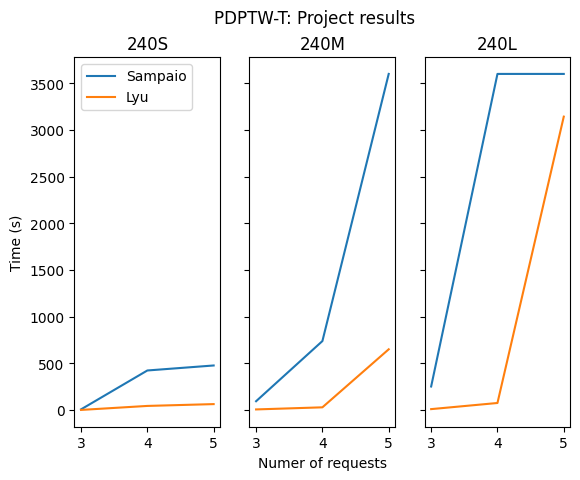

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True)

time_sampaio = an.get_results_stats(df_sampaio)['t']
time_lyu = an.get_results_stats(df_lyu)['t']

params_enum = {
       0: '240S',
       1: '240M',
       2: '240L'
}

for i, ax in enumerate(axes):
       p = params_enum[i]
       ax.set_title(p)

       data = time_sampaio[time_sampaio.index.str.contains(p)]
       ax.plot([x[0] for x in data.index], data, label='Sampaio')

       data = time_lyu[time_lyu.index.str.contains(p)]
       ax.plot([x[0] for x in data.index], data, label='Lyu')

       if i == 0:
              ax.set_ylabel('Time (s)')
              ax.legend(loc='upper left')

       if i == 1:
              ax.set_xlabel('Numer of requests')

plt.suptitle('PDPTW-T: Project results')

fig.savefig('../figures/PDPTWT.png')
plt.show()

# PDPT Lyu Scalability on #requests

In [18]:
df = pd.read_csv('../results/PDPT-LYU-SCALABILITY-R.csv')
df['Params'] = df['Instance'].apply(lambda name: name.split('-')[1][1:])
df.sort_values(by='Time').reset_index(drop=True, inplace=True)

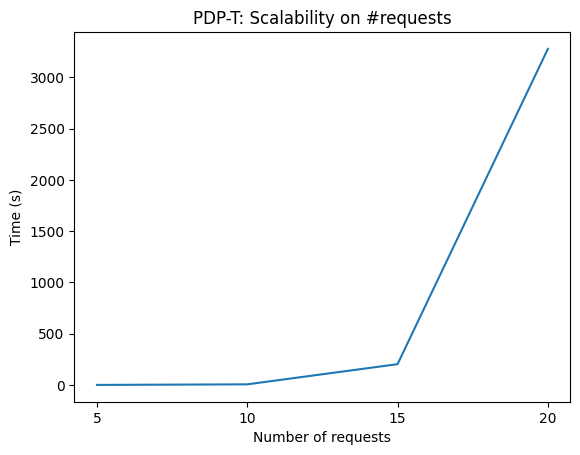

In [19]:
fig, ax = plt.subplots()
data = df.groupby('Params')['Time'].mean().sort_values()
ax.plot(data)
ax.set(title='PDP-T: Scalability on #requests',
       xlabel='Number of requests',
       ylabel='Time (s)')

fig.savefig('../figures/PDPT-LYU-SCALABILITY-R.png')
plt.show()

# PDPT Lyu Scalability on #vehicles

In [20]:
df = pd.read_csv('../results/PDPT-VEHICLES.csv')
df['Params'] = df['Instance'].apply(lambda name: int(name.split('-')[2][1:]))
df = df.sort_values('Params').reset_index(drop=True)

df_lyu = df[df['Model'] == 'Lyu']
df_rais = df[df['Model'] == 'Rais']

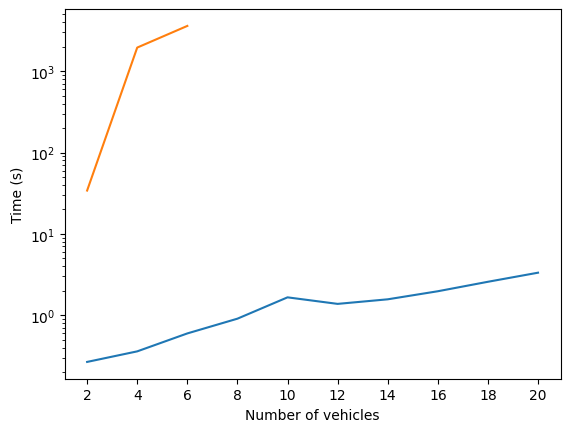

In [21]:
fig, ax = plt.subplots()

ax.set(yscale='log', 
       ylabel='Time (s)', 
       xlabel='Number of vehicles',
       xticks=range(2, 21, 2))
ax.plot(df_lyu.groupby('Params')['Time'].mean())
ax.plot(df_rais.groupby('Params')['Time'].mean())

fig.savefig('../figures/PDPT-SCALABILITY-V.png')
plt.show()

# PDPT Effect of Valid Inequalities

In [22]:
df = pd.read_csv('../results/PDPT-RAIS-WITH-VI.csv')
df = df.sort_values('Instance').reset_index(drop=True)

df_lyu = df[df['Model'] == 'Lyu']
df_lyu.set_index('Instance', inplace=True)
df_rais = df[df['Model'] == 'Rais']
df_rais.set_index('Instance', inplace=True)
df_rais_vi = df[df['Model'] == 'Rais_vi']
df_rais_vi.set_index('Instance', inplace=True)

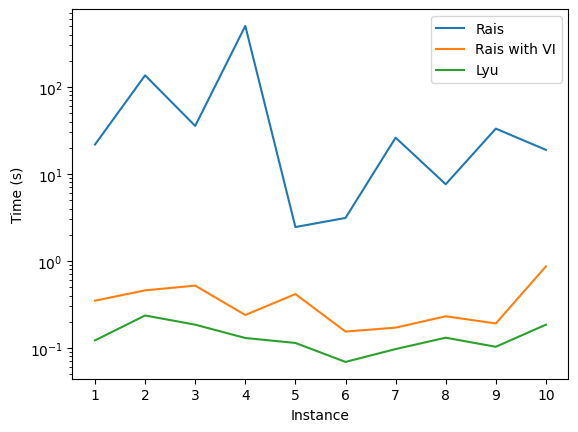

In [23]:
fig, ax = plt.subplots()

ax.set(ylabel='Time (s)',
       yscale='log',
       xlabel='Instance')

ax.plot(df_rais['Time'], label='Rais')
ax.plot(df_rais_vi['Time'], label='Rais with VI')
ax.plot(df_lyu['Time'], label='Lyu')

ax.set_xticks(range(0, 10), range(1, 11))
ax.legend()

fig.savefig('../figures/PDPT-ValidInequalities.png')
plt.show()